<a href="https://colab.research.google.com/github/AJAJ12348765/colab-projects/blob/main/Group_7_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


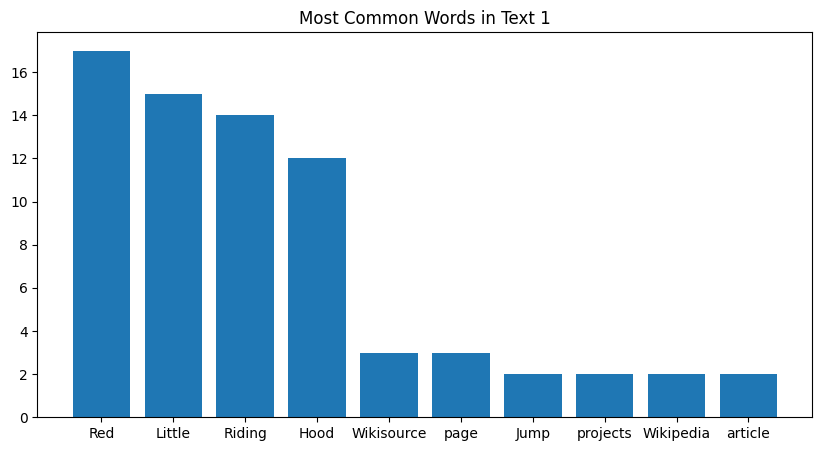

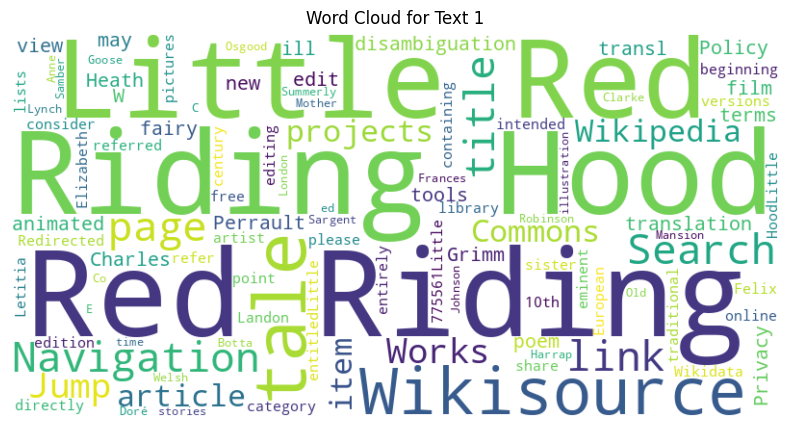

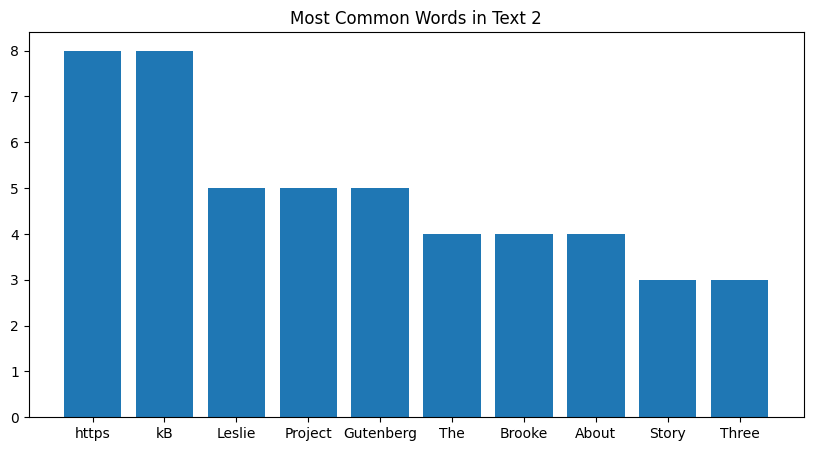

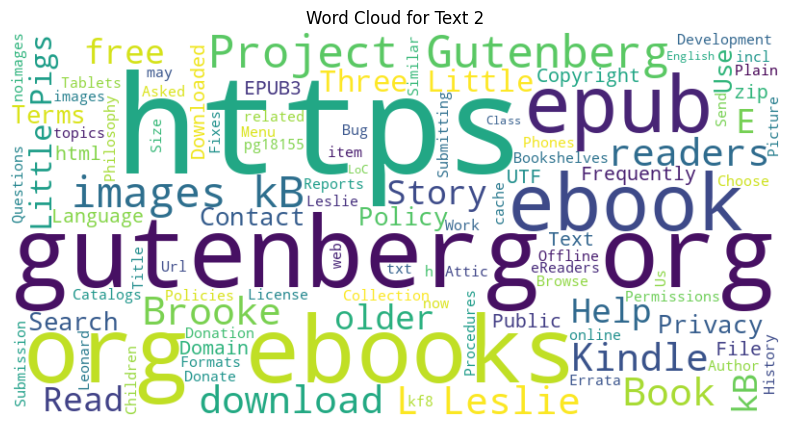

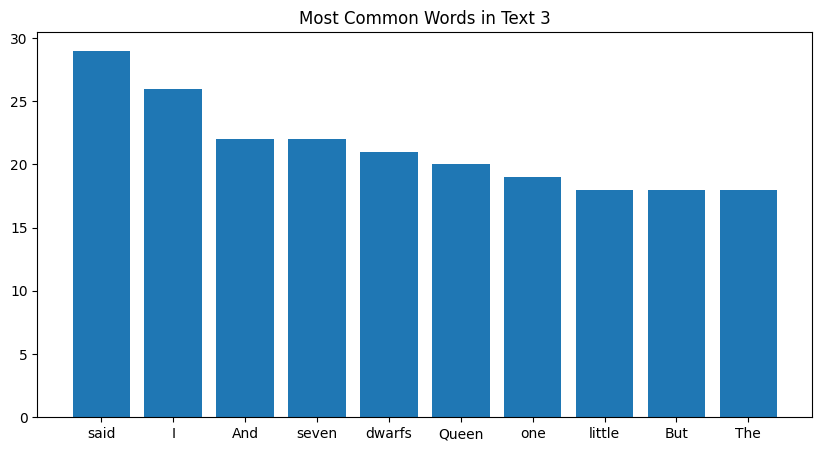

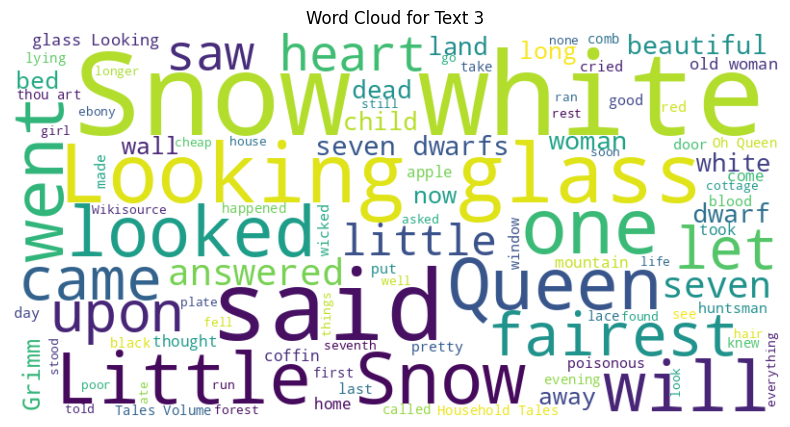

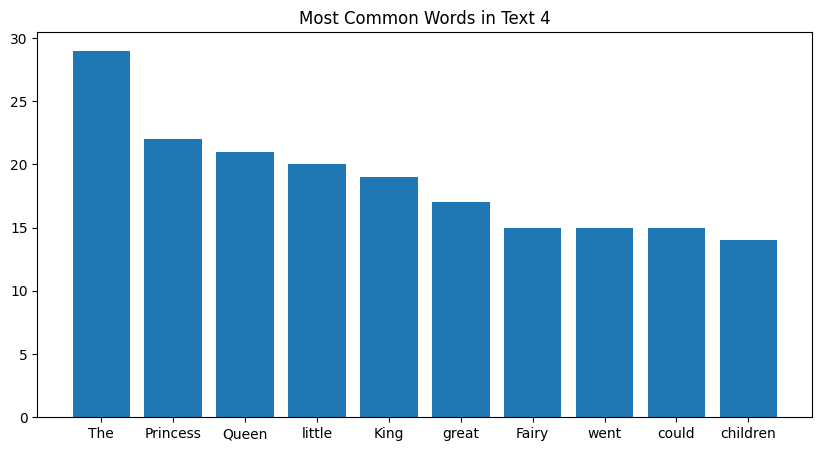

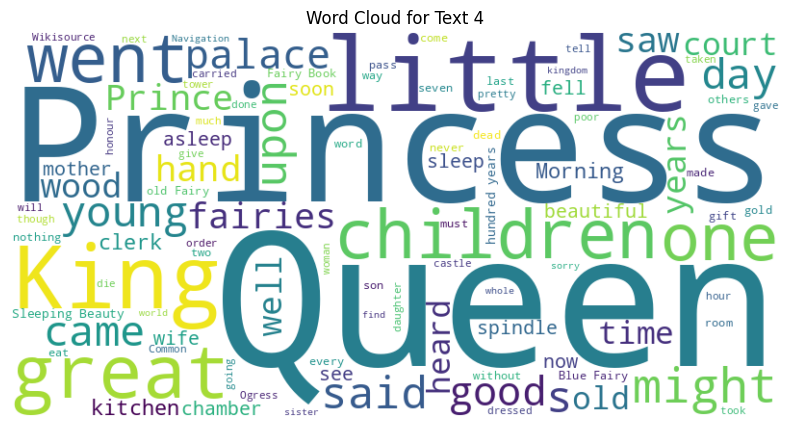

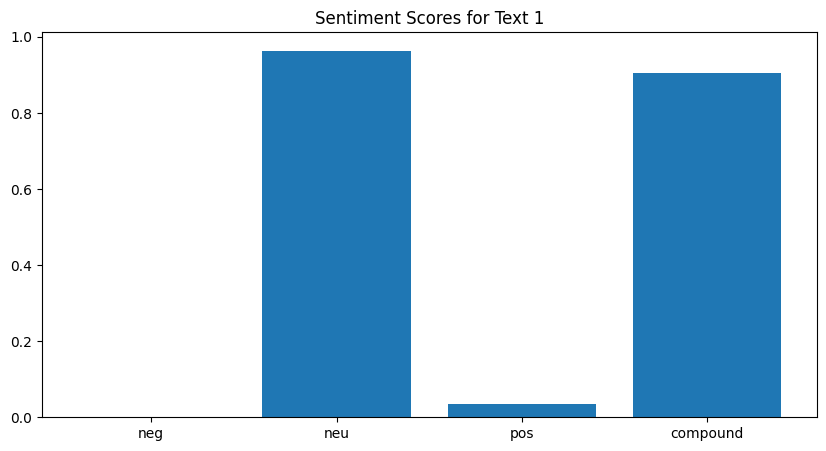

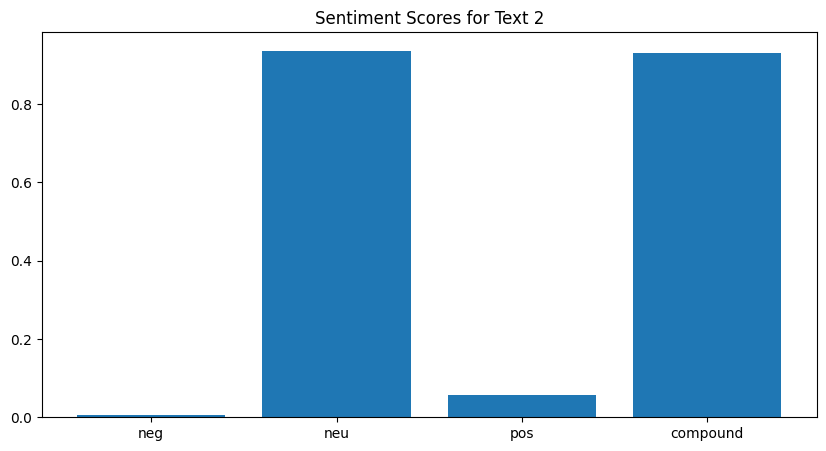

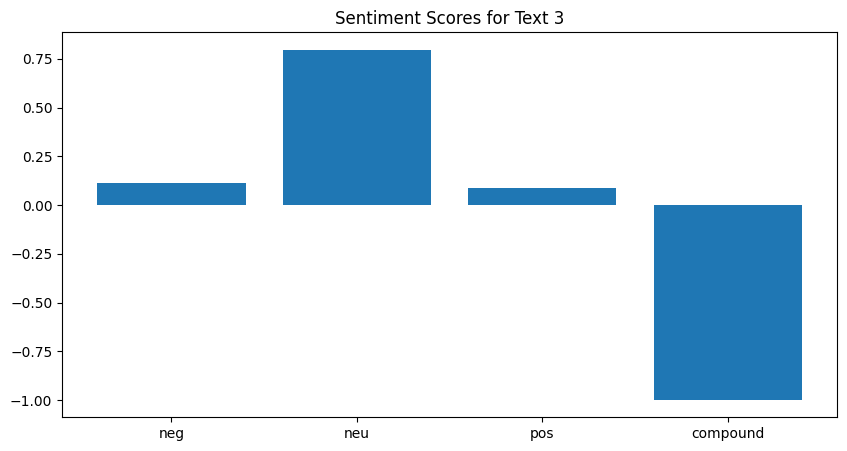

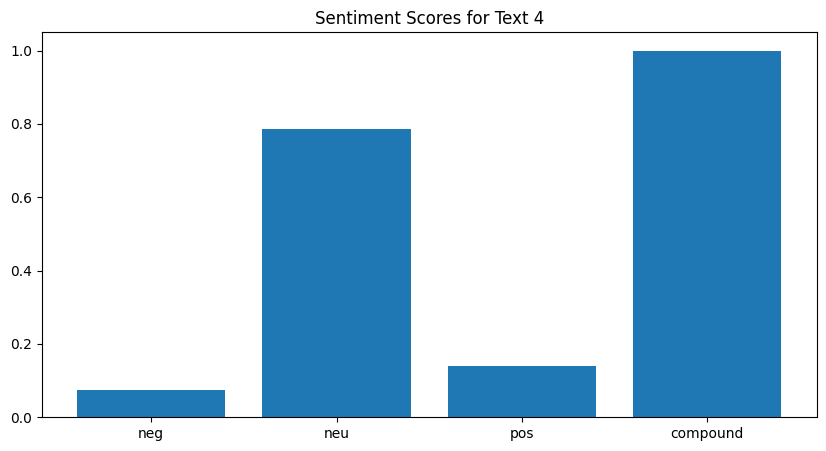

[(0, '0.069*"," + 0.046*"the" + 0.034*"and" + 0.030*"." + 0.020*"she" + 0.017*"a" + 0.016*"of" + 0.015*"to" + 0.012*"\'\'" + 0.012*"was"'), (1, '0.071*"," + 0.047*"the" + 0.035*"and" + 0.020*"." + 0.019*"her" + 0.018*"to" + 0.017*"of" + 0.015*"she" + 0.014*"was" + 0.013*"in"'), (2, '0.026*"," + 0.022*"the" + 0.018*"." + 0.013*"and" + 0.008*"a" + 0.007*"she" + 0.007*"her" + 0.006*"Red" + 0.006*"to" + 0.006*")"'), (3, '0.068*"," + 0.032*"the" + 0.027*"." + 0.022*"and" + 0.016*"of" + 0.013*"to" + 0.013*"she" + 0.013*"was" + 0.013*"her" + 0.012*"a"'), (4, '0.011*"," + 0.005*"the" + 0.005*"she" + 0.004*"and" + 0.004*"." + 0.004*"a" + 0.004*"her" + 0.003*"was" + 0.003*"in" + 0.003*"to"'), (5, '0.024*"," + 0.015*"the" + 0.011*"." + 0.009*"and" + 0.007*"of" + 0.007*"to" + 0.007*"her" + 0.007*"a" + 0.006*"she" + 0.006*"in"'), (6, '0.040*"," + 0.019*"the" + 0.017*"and" + 0.012*"of" + 0.012*"." + 0.012*"she" + 0.010*"to" + 0.010*"her" + 0.009*"that" + 0.009*"a"'), (7, '0.061*"," + 0.039*"the" + 0

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

nltk.download('vader_lexicon')

!pip install gensim
import gensim
!pip install matplotlib wordcloud



import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize, bigrams
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# URLs of the stories
urls = [
    "https://en.wikisource.org/wiki/Little_Red-Riding-Hood",
    "https://www.gutenberg.org/ebooks/18155",
    "https://en.wikisource.org/wiki/Grimm%27s_Household_Tales,_Volume_1/Little_Snow-White",
    "https://en.wikisource.org/wiki/The_Blue_Fairy_Book/The_Sleeping_Beauty_in_the_Wood"
]

# Download the texts
texts = []
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    texts.append(text)

# Analysis of Commonly Used Vocabulary and Keyword Analysis
stop_words = set(stopwords.words('english'))
for i, text in enumerate(texts):
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    freq_dist = FreqDist(words)

    # Plot most common words
    words, frequencies = zip(*freq_dist.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.title(f'Most Common Words in Text {i+1}')
    plt.show()

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Text {i+1}')
    plt.show()

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
for i, text in enumerate(texts):
    sentiment_scores = sia.polarity_scores(text)

    # Plot sentiment scores
    labels, scores = zip(*sentiment_scores.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, scores)
    plt.title(f'Sentiment Scores for Text {i+1}')
    plt.show()

# Theme Analysis
texts = [word_tokenize(text) for text in texts]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary)
topics = lda.print_topics()
print(topics)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


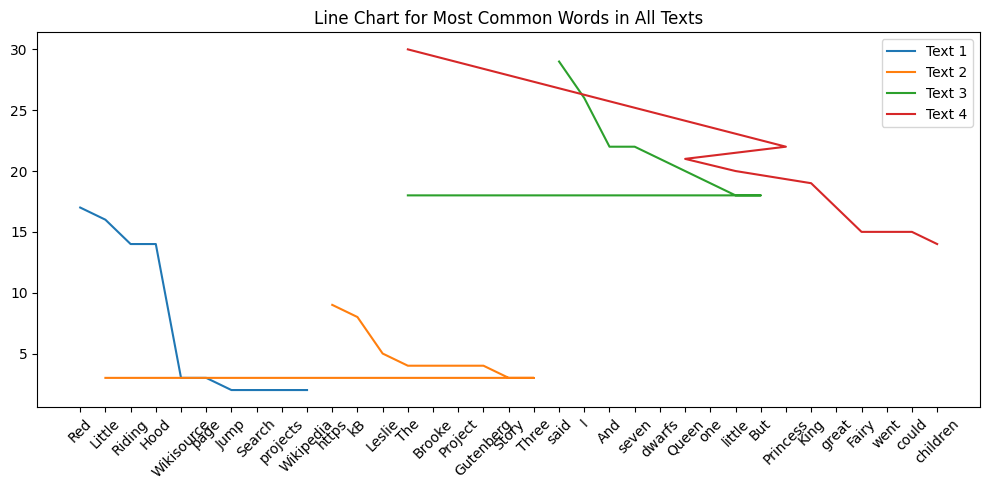

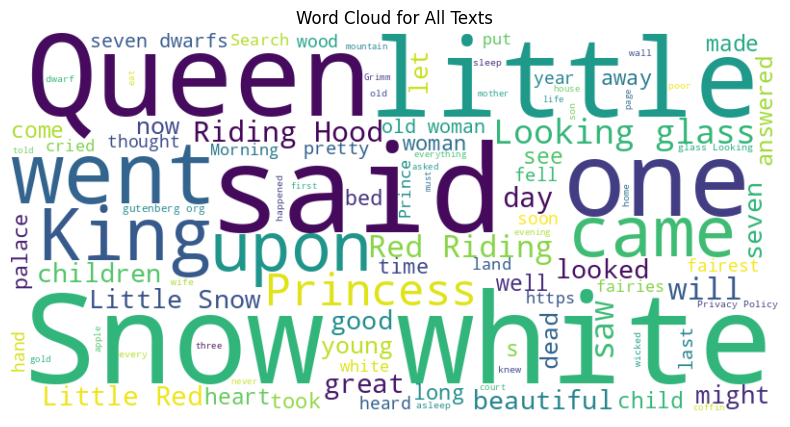

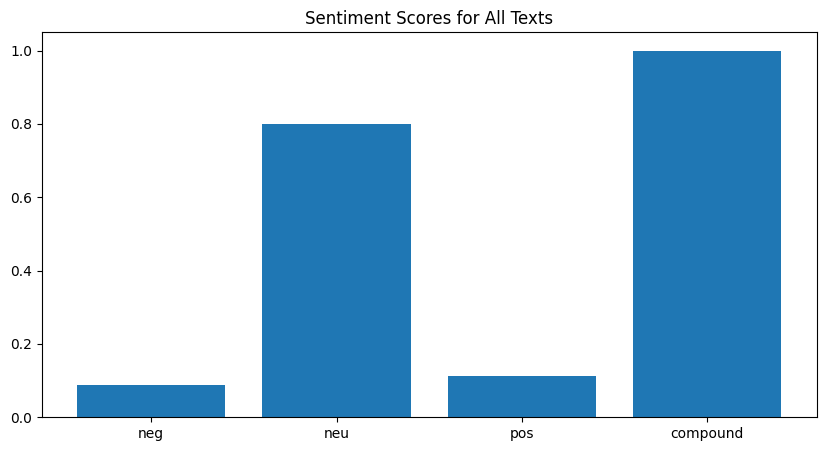

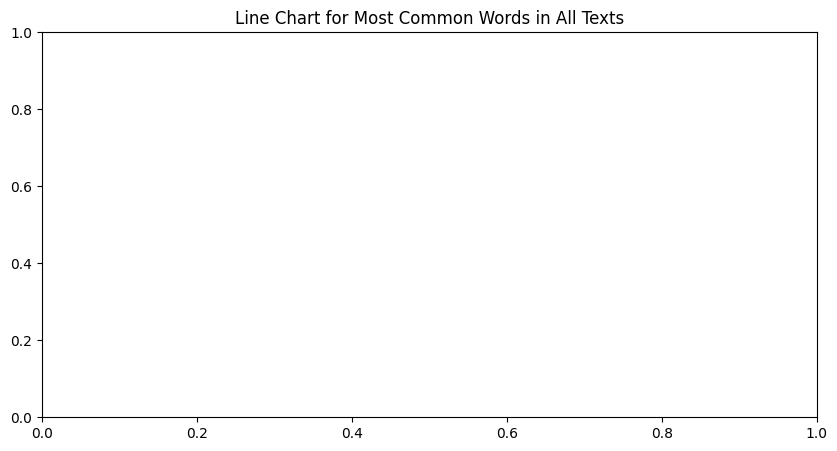

[(0, '0.047*"," + 0.026*"the" + 0.024*"." + 0.018*"and" + 0.018*"of" + 0.014*"to" + 0.013*"her" + 0.012*"a" + 0.012*"she" + 0.011*"was"'), (1, '0.060*"," + 0.045*"the" + 0.037*"and" + 0.029*"." + 0.014*"of" + 0.014*"to" + 0.013*"she" + 0.012*"\'\'" + 0.011*"her" + 0.010*"a"'), (2, '0.066*"," + 0.026*"the" + 0.026*"and" + 0.018*"." + 0.017*"to" + 0.014*"a" + 0.012*"of" + 0.011*"she" + 0.011*"her" + 0.011*"in"'), (3, '0.040*"," + 0.032*"and" + 0.025*"the" + 0.019*"." + 0.016*"she" + 0.013*"of" + 0.010*"\'\'" + 0.010*"``" + 0.010*"to" + 0.009*"a"'), (4, '0.042*"," + 0.027*"the" + 0.018*"of" + 0.018*"and" + 0.017*"." + 0.015*"a" + 0.013*"to" + 0.012*"her" + 0.010*"was" + 0.009*"she"'), (5, '0.071*"," + 0.048*"the" + 0.029*"." + 0.028*"and" + 0.020*"she" + 0.018*"her" + 0.015*"of" + 0.014*"\'\'" + 0.014*"was" + 0.013*"a"'), (6, '0.083*"," + 0.041*"the" + 0.027*"and" + 0.022*"." + 0.018*"she" + 0.018*"to" + 0.015*"of" + 0.014*"was" + 0.013*"a" + 0.013*"her"'), (7, '0.043*"," + 0.036*"the" + 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# URLs of the stories
urls = [
    "https://en.wikisource.org/wiki/Little_Red-Riding-Hood",
    "https://www.gutenberg.org/ebooks/18155",
    "https://en.wikisource.org/wiki/Grimm%27s_Household_Tales,_Volume_1/Little_Snow-White",
    "https://en.wikisource.org/wiki/The_Blue_Fairy_Book/The_Sleeping_Beauty_in_the_Wood"
]

# Download the texts
texts = []
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    texts.append(text)

# Analysis of Commonly Used Vocabulary and Keyword Analysis
stop_words = set(stopwords.words('english'))
plt.figure(figsize=(10, 5))
for i, text in enumerate(texts):
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    freq_dist = FreqDist(words)

    # Get most common words and their frequencies
    common_words, frequencies = zip(*freq_dist.most_common(10))
   # Plot frequencies
    plt.plot(common_words, frequencies, label=f'Text {i+1}')

plt.title('Line Chart for Most Common Words in All Texts')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Texts')
plt.show()

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(combined_text)

# Plot sentiment scores
labels, scores = zip(*sentiment_scores.items())
plt.figure(figsize=(10, 5))
plt.bar(labels, scores)
plt.title('Sentiment Scores for All Texts')
plt.show()

# Generate line chart for most common words across all texts
plt.figure(figsize=(10, 5))
plt.title('Line Chart for Most Common Words in All Texts')
plt.show()

# Theme Analysis
texts = [word_tokenize(text) for text in texts]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary)
topics = lda.print_topics()
print(topics)
